<a href="https://colab.research.google.com/github/AarambhaAnta/machine-learning/blob/main/studentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd


In [30]:
# fetch the students data in data variable
dataset = fetch_ucirepo(id=320)
# print(dataset)
data = pd.DataFrame(dataset.data.original)

In [31]:
# exploring the data
# print(data)
print(data.head())

# summary statistic
print(data.describe())

# check for missing values
print(data.isnull().sum())

  school sex  age address famsize Pstatus  Medu  ...  Dalc Walc health absences  G1  G2  G3
0     GP   F   18       U     GT3       A     4  ...     1    1      3        4   0  11  11
1     GP   F   17       U     GT3       T     1  ...     1    1      3        2   9  11  11
2     GP   F   15       U     LE3       T     1  ...     2    3      3        6  12  13  12
3     GP   F   15       U     GT3       T     4  ...     1    1      5        0  14  14  14
4     GP   F   16       U     GT3       T     3  ...     1    2      5        0  11  13  13

[5 rows x 33 columns]
              age        Medu        Fedu  ...          G1          G2          G3
count  649.000000  649.000000  649.000000  ...  649.000000  649.000000  649.000000
mean    16.744222    2.514638    2.306626  ...   11.399076   11.570108   11.906009
std      1.218138    1.134552    1.099931  ...    2.745265    2.913639    3.230656
min     15.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     16

In [32]:
# encoding the categorical data using one-hot encoding
data_encoded = pd.get_dummies(data)

# normalize/standardize numerical features if needed
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

In [33]:
from sklearn.model_selection import train_test_split

# features and targets
x = data_encoded.drop('G3',axis=1)
y = data_encoded['G3']

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

# initilize the model
model = LinearRegression()

# train the model
model.fit(x_train,y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-Square Score: {r2}")

Mean Absolute Error: 0.7652118389423077
Mean Squared Error: 1.4768048543196457
R-Square Score: 0.8485594886167689


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# initilize a more complex model
rf_model = RandomForestRegressor()

# Hyperparameters turning
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10,20,30]
}

grid_search = GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=3)
grid_search.fit(x_train,y_train)

# best parameters
print(grid_search.best_params_)

# evaluate the improved model
y_pred_rf = grid_search.predict(x_test)

print(f"Improved MAE: {mean_absolute_error(y_test,y_pred_rf)}")
print(f"Improved MSE: {mean_squared_error(y_test,y_pred_rf)}")
print(f"Improved R-Square Score: {r2_score(y_test,y_pred_rf)}")

{'max_depth': 30, 'n_estimators': 100}
Improved MAE: 0.7693076923076922
Improved MSE: 1.645706923076923
Improved R-Square Score: 0.8312392478337904


In [39]:
# feature importance for random forest
importances = grid_search.best_estimator_.feature_importances_
feature_importance = pd.Series(importances,index=x.columns).sort_values(ascending=False)
print(feature_importance)

G2                   0.826761
absences             0.031132
G1                   0.015623
freetime             0.009555
age                  0.008857
Dalc                 0.007444
reason_other         0.007263
Medu                 0.006578
famrel               0.005402
goout                0.005248
Fedu                 0.005141
failures             0.004880
health               0.004798
Walc                 0.004642
Mjob_teacher         0.004568
studytime            0.003531
traveltime           0.003405
Mjob_other           0.003166
school_GP            0.002863
school_MS            0.002803
guardian_father      0.002182
reason_course        0.002041
Fjob_services        0.001900
famsize_GT3          0.001691
Fjob_other           0.001605
famsup_no            0.001494
famsup_yes           0.001398
address_U            0.001372
sex_F                0.001336
activities_no        0.001186
sex_M                0.001170
famsize_LE3          0.001165
reason_reputation    0.001157
romantic_n

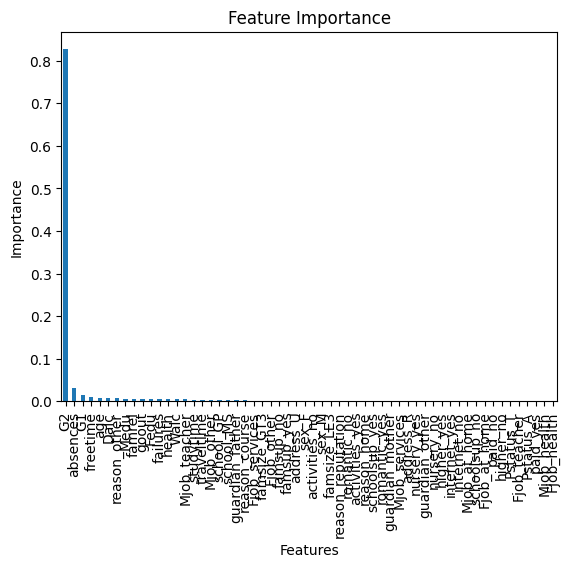

In [40]:
import matplotlib.pyplot as plt

# visualize feature importance
feature_importance.plot(kind='bar',title='Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()